In [246]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Reshape

In [250]:
input_df = pd.read_csv("../../data/csv_files/df_ph1.csv")
input_df.shape

(7748, 10)

In [252]:
first_range = ["2023-07-28 05:00:00", "2023-08-31 22:00:00"]
second_range = ["2023-10-18 16:00:00", "2024-01-01 01:00:00"]
third_range = ["2024-01-24 14:06:00", "2024-06-13 01:00:00"]
time_ranges = [first_range, second_range, third_range]

In [254]:
conditions = [((input_df['dt'] >= start) & (input_df['dt'] < end)) for start, end in time_ranges]
combined_condition = conditions[0]
for condition in conditions[1:]:
    combined_condition |= condition

new_df = input_df[combined_condition]
new_df.shape

(6022, 10)

In [256]:
stations_name = list(input_df.columns)
stations_name.remove("dt")

index_name = {}
for i, name in enumerate(stations_name):
    index_name[i] = name
index_name

{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [258]:
new_df.isna().sum()

dt             0
FEX_004       33
FSB_095DR     65
FSB_078       32
FSB_126      907
FSB_130D     259
FPZ_06A       36
FSB_079       31
FPZ_04A      121
FSB_097D     198
dtype: int64

In [260]:
input_df = new_df.interpolate(method="linear")

In [262]:
input_df.isna().sum()

dt           0
FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [264]:
datetime = input_df['dt']
df = input_df[2:]
datetime = df['dt']
df = df.drop(columns = ['dt'])
df.shape

(6020, 9)

In [266]:
arr = df.values

In [268]:
reshaped_arr = arr.reshape((6020, 9, 1))
reshaped_arr.shape

(6020, 9, 1)

In [270]:
def create_4d_array(array, window_size, overlap):
    step = window_size - overlap
    num_rows, num_columns, depth = array.shape
    num_windows = (num_rows - window_size) // step + 1

    array_4d = np.zeros((num_windows, window_size, num_columns, depth))

    count = 0
    for i in range(0, num_windows, step):
        array_4d[count] = array[i:i+window_size]
        count += 1

    return array_4d

In [274]:
X_train = create_4d_array(reshaped_arr, 10, 6)
X_train.shape

(1503, 10, 9, 1)

In [300]:
model = Sequential([
    Conv2D(32, kernel_size=(3,1), activation='relu', input_shape=(10, 9, 1)),
    
    Conv2D(64, kernel_size=(3,1), activation='relu'),
    
    Flatten(),    
    Dense(64, activation='relu'),
    Dense(10 * 9 * 1 , activation='linear'),
    Reshape((10, 9, 1))
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [302]:
model.fit(X_train, X_train, epochs = 100, batch_size = 64)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8114 
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0484
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8827
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1994
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0350
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 15/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Epo

In [304]:
X_test = create_4d_array(reshaped_arr, 10, 0)

In [306]:
X_test.shape

(602, 10, 9, 1)

In [327]:
model.evaluate(X_test, X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 


0.0005492917262017727

In [329]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step


In [331]:
y_pred_reshaped = y_pred.reshape((-1, 9))
y_pred_reshaped.shape

(6020, 9)

In [333]:
predicted_df = pd.DataFrame(y_pred_reshaped)

In [335]:
predicted_df.rename(columns = index_name, inplace = True)

In [337]:
predicted_df

,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
0,4.000945,4.213075,4.123800,4.156574,4.097394,5.185800,7.841298,6.498058,3.759107
1,3.951020,4.127401,4.075186,4.106010,4.147378,5.119956,7.853593,6.523043,3.761520
2,3.941314,4.165363,4.064222,4.145310,4.115364,5.170464,7.853159,6.506928,3.750192
3,3.955634,4.174047,4.058808,4.150149,4.123760,5.170368,7.865863,6.511858,3.758668
4,3.937133,4.211365,4.111126,4.213652,4.136055,5.186227,7.878508,6.522277,3.737363
...,...,...,...,...,...,...,...,...,...
6015,-0.000074,0.000044,0.000034,0.000009,0.000016,-0.000146,-0.000070,0.000218,0.000003
6016,-0.000043,0.000039,0.000021,-0.000167,0.000019,-0.000127,-0.000047,0.000070,0.000030
6017,0.000040,-0.000074,-0.000023,0.000020,0.000005,-0.000097,-0.000029,-0.000019,0.000024
6018,-0.000020,-0.000070,0.000019,-0.000064,0.000032,-0.000330,0.000068,-0.000066,0.000027


In [320]:
df

,FEX_004,FSB_095DR,FSB_078,FSB_126,FSB_130D,FPZ_06A,FSB_079,FPZ_04A,FSB_097D
2,3.980825,4.236443,4.163040,4.179049,4.129939,5.271060,7.712299,6.417948,3.767076
3,3.981121,4.236699,4.166883,4.179205,4.130379,5.267786,7.712222,6.417735,3.767253
4,3.981221,4.239193,4.168008,4.179361,4.130503,5.265711,7.712381,6.417951,3.767425
5,3.980744,4.239561,4.167699,4.179517,4.131535,5.262128,7.713662,6.417348,3.767600
6,3.981171,4.239878,4.170600,4.179673,4.132225,5.259296,7.715626,6.416831,3.767326
...,...,...,...,...,...,...,...,...,...
7743,4.373425,4.483142,4.300413,4.495069,4.439222,5.585535,7.878193,7.592293,4.167729
7744,4.374073,4.482854,4.301687,4.494333,4.439609,5.582193,7.877029,7.593216,4.167895
7745,4.375431,4.483341,4.304706,4.495460,4.439438,5.579660,7.880521,7.605413,4.167374
7746,4.373557,4.482985,4.309968,4.494287,4.439528,5.576629,7.880730,7.593132,4.168333


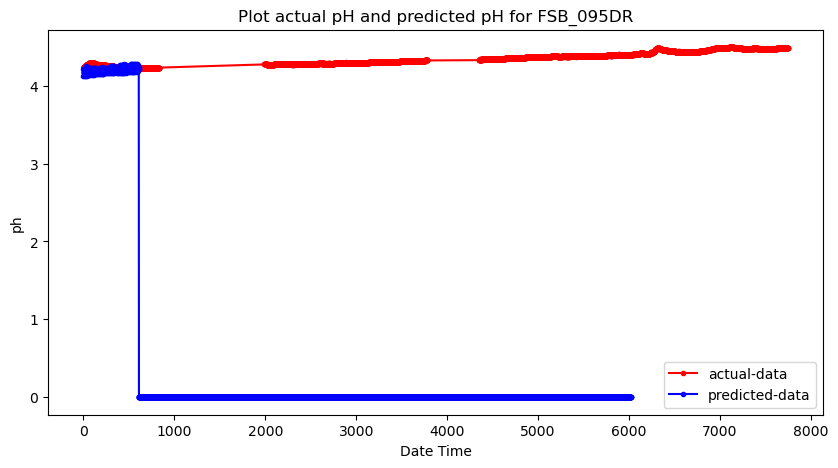

((6020,), (6020,))

In [324]:
plt.figure(figsize=(10, 5))
# for index in index_name.values():
index = index_name[1]

plt.plot(df[index], marker='.', color="red", label="actual-data")
plt.plot(predicted_df[index], marker='.', color="blue", label = "predicted-data")


plt.xlabel('Date Time')
plt.ylabel('ph')
plt.title(f'Plot actual pH and predicted pH for {index}')
plt.legend()
plt.show()

df[index].shape, predicted_df[index].shape